# Lab 1 - introduction to Keras

In this lab, you will learn how to create your first neural network, and how to train it. the goal of this lab is to reproduce some of the results we have experimented with during the class.


In [1]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.6.10 |Anaconda, Inc.| (default, May  8 2020, 02:54:21) 
[GCC 7.3.0]
Version info.
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)


In [12]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import regularizers

from sklearn.model_selection import train_test_split

%matplotlib inline


This first function allows you to generate data which looks like the *circular data* on [the online tensorflow playground](https://playground.tensorflow.org).

If you want the data to include some noise, you should set the noise parameter to 0.2 or 0.3

In [16]:
def generateData(n, noise=0):
  if noise<0:
    noise=0
  elif noise>50:
    noise=50
  a = np.random.rand(n) * 2 * np.pi
  c1 = (0.9+np.random.rand(n)*noise*2-noise)*np.random.rand(n)*np.vstack((np.cos(a), np.sin(a)))
  b = np.random.rand(n) * 2 * np.pi
  c2 = (1+np.random.rand(n)+np.random.rand(n)*noise*2-noise)*np.vstack((np.cos(b), np.sin(b)))

  x = np.concatenate((c1,c2), axis=1)
  y = np.concatenate((np.zeros((n)),np.ones((n))),axis=0)
  
  return x, y

In [4]:
np.pi

3.141592653589793

Generate 200 data points and plot data


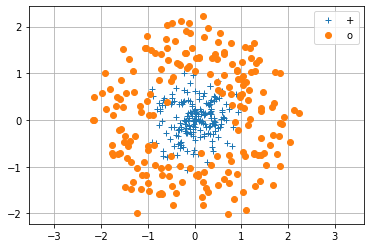

In [49]:
x, y = generateData(200, noise=0.4)

plt.plot(x[0][np.where(y == 0)], x[1][np.where(y == 0)], '+', label='+')
plt.plot(x[0][np.where(y == 1)], x[1][np.where(y == 1)], 'o', label='o')

plt.axis('equal')
plt.legend()
plt.grid()

The following function will be useful to print the evolution of the training and validation losses at the end of training.



In [17]:
def plot_loss(val_loss, train_loss):
  plt.plot(val_loss, color='green', label='Error validation')
  plt.plot(train_loss, color='blue', linestyle='--', label='Error driven')
  plt.xlabel('Epochs')
  plt.ylim(0, 1)
  plt.title('Evolution of the loss on the training and validation sets during the training')
  plt.legend()

# Guided example of building and training your first neural network


First, let's build the model! Here the model only has a single hidden layer, which contains 2 neurons with a relu activation function. The output layer has only one neuron, with a sigmoid activation function. This means we are solving a binary classification problem. 


In [57]:
model = Sequential()
model.add(Dense(2, activation='relu', input_dim=2)) # First hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.summary() # print the model summary

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


**Assignment**: Explain why this neural network has 9 parameters.

Then, let's set up training using stochastic gradient descent (SGD).

In [14]:
sgd = optimizers.SGD(lr=0.03) # We use the stochastic gradient descent Optimizer, with a learning rate of 0.03

# Here we define the optimizer,  the loss function and the metrics we want to monitor during training.
# The loss function is binary cross-entropy since we are solving a binary classification problem.
# Accuracy designates the percentage of correctly classifed data.
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Start training using mini-batches of size 10, on 200 epochs.
# the validation_split parameter means we are keeping a fraction of the data (here, 20%)
# to serve as validation data.
history = model.fit(np.transpose(x), y, validation_split=0.2, epochs=200, batch_size=10)


l_accuracy: 0.6500
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8387 - val_loss: 0.6304 - val_accuracy: 0.6500
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7832 - val_loss: 0.6310 - val_accuracy: 0.6500
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8199 - val_loss: 0.6292 - val_accuracy: 0.6500
Epoch 64/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7995 - val_loss: 0.6267 - val_accuracy: 0.6500
Epoch 65/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8127 - val_loss: 0.6289 - val_accuracy: 0.6500
Epoch 66/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7934 - val_loss: 0.6261 - val_accuracy: 0.6500
Epoch 67/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7793 - val_loss: 0.6258 - val_accu

Plotting the evolution of training and validation losses

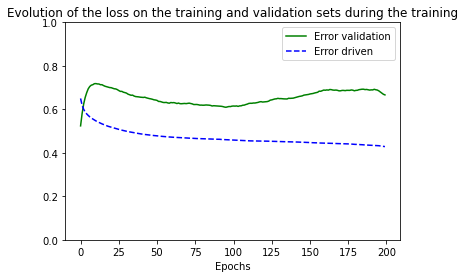

In [15]:
val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
plot_loss(val_loss, train_loss)

We can observe the training loss is still very high : our model is **under-fitting**.

We also generate a new set of data, called the test set, on which we will obtain the final performance of our model:


In [16]:
x_test, y_test = generateData(100)
model.evaluate(np.transpose(x_test), y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8600


[0.38183799386024475, 0.8600000143051147]

#Assignments

Please reproduce the results we have observed on the tensorflow playground using Keras:


1 - First, you should show the vanishing gradients phenomenon. Create a neural network of depth 5, with 4 neurons per hiden layer, and a sigmoid activation function on the hidden layers. You should observe the network is not learning.

2 - Then, solve the vanishing gradients problem by switching the hidden layers activation functions to relu.

3 - After that, we will illustrate the benefits of regularization by weight decay. First, create a large neural network (8 layers of 10 neurons each) and try to overfit the training set.

4 - Finally, add a weight decay (L2) on each hidden layer and show how it can limit overfitting. To use weight decay in Keras, you should use the [kernel_regularizer](https://keras.io/api/layers/regularizers/) parameter of the hidden layers.


## Question 1:

In [42]:
def plot_data(x, y):
    plt.plot(x[0][np.where(y == 0)], x[1][np.where(y == 0)], '+', label='+')
    plt.plot(x[0][np.where(y == 1)], x[1][np.where(y == 1)], 'o', label='o')

    plt.axis('equal')
    plt.legend()
    plt.grid()

In [84]:
def plot_accuracy_loss(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

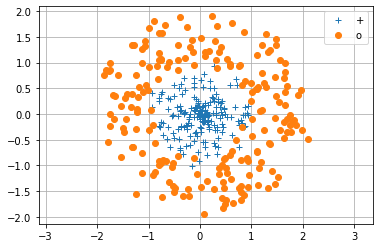

In [132]:
x, y = x, y = generateData(200, noise=0.2)
plot_data(x, y)

Model: "sequential_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 4)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer3 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer4 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer5 (Dense)               (None, 1)                 5         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________

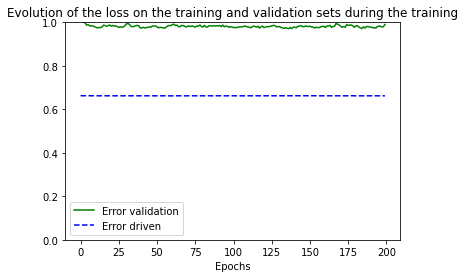

In [136]:
# Define Sequential model
model = Sequential(
    [
        Dense(2, input_dim=2, name="layer0"),               # Input layer
        Dense(4, activation='sigmoid', name="layer1"),
        Dense(4, activation='sigmoid', name="layer2"),
        Dense(4, activation='sigmoid', name="layer3"),
        Dense(4, activation='sigmoid', name="layer4"),
        Dense(1, activation='sigmoid', name="layer5")       # Output layer
    ]
)

model.summary() # print the model summary

sgd = optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Start training using
history = model.fit(np.transpose(x), y, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
plot_loss(val_loss, train_loss)
# plot_accuracy_loss(history)

## Question 2:

Model: "sequential_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 4)                 12        
_________________________________________________________________
layer2 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer3 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer4 (Dense)               (None, 4)                 20        
_________________________________________________________________
layer5 (Dense)               (None, 1)                 5         
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________

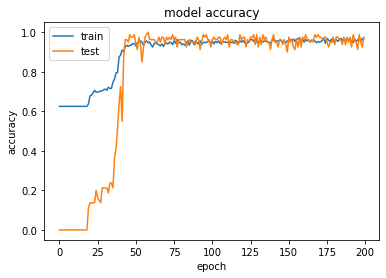

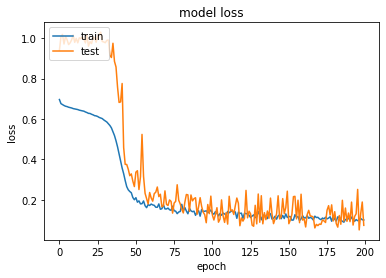

In [137]:
# Define Sequential model
model = Sequential(
    [
        Dense(2, input_dim=2, name="layer0"),            # Input layer
        Dense(4, activation='relu', name="layer1"),
        Dense(4, activation='relu', name="layer2"),
        Dense(4, activation='relu', name="layer3"),
        Dense(4, activation='relu', name="layer4"),
        Dense(1, activation='sigmoid', name="layer5")       # Output layer
    ]
)

model.summary() # print the model summary

sgd = optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Start training using
history = model.fit(np.transpose(x), y, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
# plot_loss(val_loss, train_loss)
plot_accuracy_loss(history)

## Question 3:

In [161]:
def plot_decision_boundary(pred_func, X, y, figure=None):
    """Plot a decision boundary"""

    if figure is None:  # If no figure is given, create a new one
        plt.figure()
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

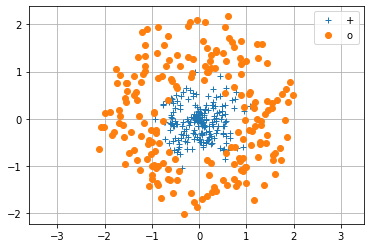

In [168]:
x, y = generateData(200, noise=0.3)
plot_data(x, y)

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 10)                30        
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 10)                110       
_________________________________________________________________
layer4 (Dense)               (None, 10)                110       
_________________________________________________________________
layer5 (Dense)               (None, 10)                110       
_________________________________________________________________
layer6 (Dense)               (None, 10)             

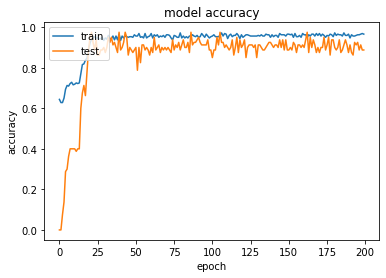

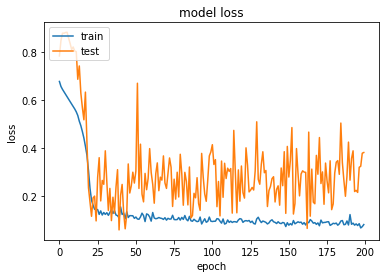

In [178]:
# Define Sequential model
model = Sequential(
    [
        Dense(2, input_dim=2, name="layer0"),            # Input layer
        Dense(10, activation='relu', name="layer1"),
        Dense(10, activation='relu', name="layer2"),
        Dense(10, activation='relu', name="layer3"),
        Dense(10, activation='relu', name="layer4"),
        Dense(10, activation='relu', name="layer5"),
        Dense(10, activation='relu', name="layer6"),
        Dense(1, activation='sigmoid', name="layer7")    # Output layer
    ]
)

model.summary() # print the model summary

sgd = optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Start training using
history = model.fit(np.transpose(x), y, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
# plot_loss(val_loss, train_loss)
plot_accuracy_loss(history)


## Question 4:

In [153]:
def custom_l2_regularizer(weights):
    return tf.reduce_sum(0.02 * tf.square(weights))

Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer0 (Dense)               (None, 2)                 6         
_________________________________________________________________
layer1 (Dense)               (None, 10)                30        
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 10)                110       
_________________________________________________________________
layer4 (Dense)               (None, 10)                110       
_________________________________________________________________
layer5 (Dense)               (None, 10)                110       
_________________________________________________________________
layer6 (Dense)               (None, 10)             

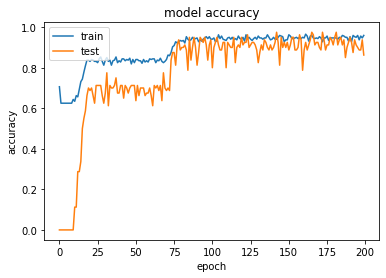

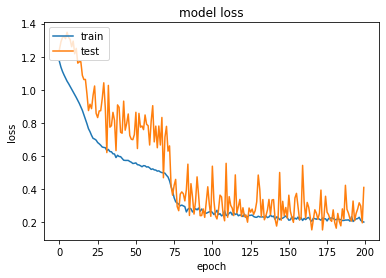

In [179]:
# Define Sequential model
model = Sequential(
    [
        Dense(2, input_dim=2, name="layer0"),            # Input layer
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer1"),
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer2"),
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer3"),
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer4"),
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer5"),
        Dense(10, kernel_regularizer='l2', activation='relu', name="layer6"),
        Dense(1, activation='sigmoid', name="layer7")    # Output layer
    ]
)

model.summary() # print the model summary

sgd = optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Start training using
history = model.fit(np.transpose(x), y, validation_split=0.2, epochs=200, batch_size=10, verbose=0)

val_loss=(history.history['val_loss'])
train_loss=(history.history['loss'])
# plot_loss(val_loss, train_loss)
plot_accuracy_loss(history)
